<a href="https://colab.research.google.com/github/sagihaider/EEG_Deep/blob/master/main_Single_Trial_Classification_PatientData_CrossSubject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/sagihaider/EEG_Deep.git

Cloning into 'EEG_Deep'...
remote: Enumerating objects: 28, done.
remote: Counting objects: 100% (28/28), done.
remote: Compressing objects: 100% (27/27), done.
remote: Total 181 (delta 13), reused 5 (delta 1), pack-reused 153
Receiving objects: 100% (181/181), 856.92 MiB | 33.77 MiB/s, done.
Resolving deltas: 100% (66/66), done.
Checking out files: 100% (59/59), done.


In [2]:
import scipy.io as spio
import numpy as np
from importlib.machinery import SourceFileLoader

# EEGNet-specific imports
from EEG_Deep.EEGModels import EEGNet, ShallowConvNet, DeepConvNet
from tensorflow.keras import utils as np_utils
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras import backend as K
K.set_image_data_format('channels_first')

from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression

# tools for plotting confusion matrices
from matplotlib import pyplot as plt
from scipy.signal import butter, lfilter

from numpy import array
from sklearn.model_selection import KFold

In [0]:
# Band-pass Filter
def butter_bandpass_filter(data, lowcut, highcut, fs, order=4):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    y = lfilter(b, a, data)
    return y


1
EEG_Deep/Data2A/parsed_P01T.mat
(0, 12, 4096)
(80, 12, 4096)
(80, 1)
2
EEG_Deep/Data2A/parsed_P02T.mat
(80, 12, 4096)
(160, 12, 4096)
(160, 1)
4
EEG_Deep/Data2A/parsed_P04T.mat
(160, 12, 4096)
(240, 12, 4096)
(240, 1)
5
EEG_Deep/Data2A/parsed_P05T.mat
(240, 12, 4096)
(320, 12, 4096)
(320, 1)
6
EEG_Deep/Data2A/parsed_P06T.mat
(320, 12, 4096)
(400, 12, 4096)
(400, 1)
7
EEG_Deep/Data2A/parsed_P07T.mat
(400, 12, 4096)
(480, 12, 4096)
(480, 1)
8
EEG_Deep/Data2A/parsed_P08T.mat
(480, 12, 4096)
(560, 12, 4096)
(560, 1)
9
EEG_Deep/Data2A/parsed_P09T.mat
(560, 12, 4096)
(640, 12, 4096)
(640, 1)
10
EEG_Deep/Data2A/parsed_P010T.mat
(640, 12, 4096)
(720, 12, 4096)
(720, 1)
3
EEG_Deep/Data2A/parsed_P03E.mat
(0, 12, 4096)
(40, 12, 4096)
(40, 1)
Filtering of training data in progress
(720, 12, 4096)
Filtering of test data in progress
(40, 12, 4096)
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1.

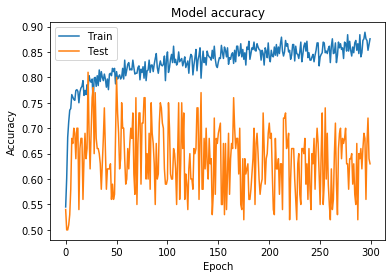


# Evaluate on test data
40/40 [==============================] - 0s 2ms/sample - loss: 0.8824 - acc: 0.6250
test loss, test acc: [0.8823598147086159, 0.625]



1
EEG_Deep/Data2A/parsed_P01T.mat


Using TensorFlow backend.


(0, 12, 4096)
(80, 12, 4096)
(80, 1)
2
EEG_Deep/Data2A/parsed_P02T.mat
(80, 12, 4096)
(160, 12, 4096)
(160, 1)
3
EEG_Deep/Data2A/parsed_P03T.mat
(160, 12, 4096)
(240, 12, 4096)
(240, 1)
4
EEG_Deep/Data2A/parsed_P04T.mat
(240, 12, 4096)
(320, 12, 4096)
(320, 1)
5
EEG_Deep/Data2A/parsed_P05T.mat
(320, 12, 4096)
(400, 12, 4096)
(400, 1)
6
EEG_Deep/Data2A/parsed_P06T.mat
(400, 12, 4096)
(480, 12, 4096)
(480, 1)
7
EEG_Deep/Data2A/parsed_P07T.mat
(480, 12, 4096)
(560, 12, 4096)
(560, 1)
8
EEG_Deep/Data2A/parsed_P08T.mat
(560, 12, 4096)
(640, 12, 4096)
(640, 1)
9
EEG_Deep/Data2A/parsed_P09T.mat
(640, 12, 4096)
(720, 12, 4096)
(720, 1)
10
EEG_Deep/Data2A/parsed_P010E.mat
(0, 12, 4096)
(40, 12, 4096)
(40, 1)
Filtering of training data in progress
(720, 12, 4096)
Filtering of test data in progress
(40, 12, 4096)
[2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 

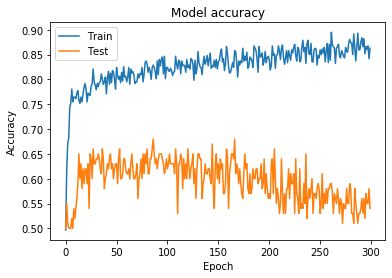


# Evaluate on test data
40/40 [==============================] - 0s 3ms/sample - loss: 0.7936 - acc: 0.5000
test loss, test acc: [0.7936480707954615, 0.5]
1
EEG_Deep/Data2A/parsed_P01T.mat
(0, 12, 4096)
(80, 12, 4096)
(80, 1)
2
EEG_Deep/Data2A/parsed_P02T.mat
(80, 12, 4096)
(160, 12, 4096)
(160, 1)
3
EEG_Deep/Data2A/parsed_P03T.mat
(160, 12, 4096)
(240, 12, 4096)
(240, 1)
4
EEG_Deep/Data2A/parsed_P04T.mat
(240, 12, 4096)
(320, 12, 4096)
(320, 1)
5
EEG_Deep/Data2A/parsed_P05T.mat
(320, 12, 4096)
(400, 12, 4096)
(400, 1)
6
EEG_Deep/Data2A/parsed_P06T.mat
(400, 12, 4096)
(480, 12, 4096)
(480, 1)
8
EEG_Deep/Data2A/parsed_P08T.mat
(480, 12, 4096)
(560, 12, 4096)
(560, 1)
9
EEG_Deep/Data2A/parsed_P09T.mat
(560, 12, 4096)
(640, 12, 4096)
(640, 1)
10
EEG_Deep/Data2A/parsed_P010T.mat
(640, 12, 4096)
(720, 12, 4096)
(720, 1)
7
EEG_Deep/Data2A/parsed_P07E.mat
(0, 12, 4096)
(40, 12, 4096)
(40, 1)
Filtering of training data in progress
(720, 12, 4096)
Filtering of test data in progress
(40, 12, 40

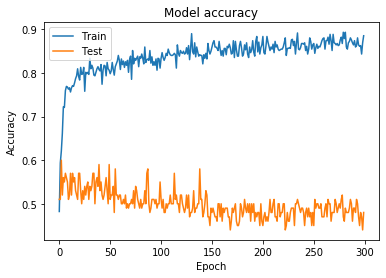


# Evaluate on test data
40/40 [==============================] - 0s 2ms/sample - loss: 0.8327 - acc: 0.6000
test loss, test acc: [0.8327391588361934, 0.6]
1
EEG_Deep/Data2A/parsed_P01T.mat
(0, 12, 4096)
(80, 12, 4096)
(80, 1)
2
EEG_Deep/Data2A/parsed_P02T.mat
(80, 12, 4096)
(160, 12, 4096)
(160, 1)
3
EEG_Deep/Data2A/parsed_P03T.mat
(160, 12, 4096)
(240, 12, 4096)
(240, 1)
4
EEG_Deep/Data2A/parsed_P04T.mat
(240, 12, 4096)
(320, 12, 4096)
(320, 1)
6
EEG_Deep/Data2A/parsed_P06T.mat
(320, 12, 4096)
(400, 12, 4096)
(400, 1)
7
EEG_Deep/Data2A/parsed_P07T.mat
(400, 12, 4096)
(480, 12, 4096)
(480, 1)
8
EEG_Deep/Data2A/parsed_P08T.mat
(480, 12, 4096)
(560, 12, 4096)
(560, 1)
9
EEG_Deep/Data2A/parsed_P09T.mat
(560, 12, 4096)
(640, 12, 4096)
(640, 1)
10
EEG_Deep/Data2A/parsed_P010T.mat
(640, 12, 4096)
(720, 12, 4096)
(720, 1)
5
EEG_Deep/Data2A/parsed_P05E.mat
(0, 12, 4096)
(40, 12, 4096)
(40, 1)
Filtering of training data in progress
(720, 12, 4096)
Filtering of test data in progress
(40, 12, 40

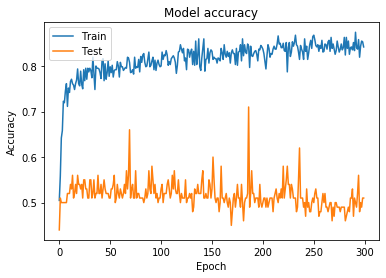


# Evaluate on test data
40/40 [==============================] - 0s 2ms/sample - loss: 0.5051 - acc: 0.7500
test loss, test acc: [0.5051267422270029, 0.75]
2
EEG_Deep/Data2A/parsed_P02T.mat
(0, 12, 4096)
(80, 12, 4096)
(80, 1)
3
EEG_Deep/Data2A/parsed_P03T.mat
(80, 12, 4096)
(160, 12, 4096)
(160, 1)
4
EEG_Deep/Data2A/parsed_P04T.mat
(160, 12, 4096)
(240, 12, 4096)
(240, 1)
5
EEG_Deep/Data2A/parsed_P05T.mat
(240, 12, 4096)
(320, 12, 4096)
(320, 1)
6
EEG_Deep/Data2A/parsed_P06T.mat
(320, 12, 4096)
(400, 12, 4096)
(400, 1)
7
EEG_Deep/Data2A/parsed_P07T.mat
(400, 12, 4096)
(480, 12, 4096)
(480, 1)
8
EEG_Deep/Data2A/parsed_P08T.mat
(480, 12, 4096)
(560, 12, 4096)
(560, 1)
9
EEG_Deep/Data2A/parsed_P09T.mat
(560, 12, 4096)
(640, 12, 4096)
(640, 1)
10
EEG_Deep/Data2A/parsed_P010T.mat
(640, 12, 4096)
(720, 12, 4096)
(720, 1)
1
EEG_Deep/Data2A/parsed_P01E.mat
(0, 12, 4096)
(40, 12, 4096)
(40, 1)
Filtering of training data in progress
(720, 12, 4096)
Filtering of test data in progress
(40, 12, 4

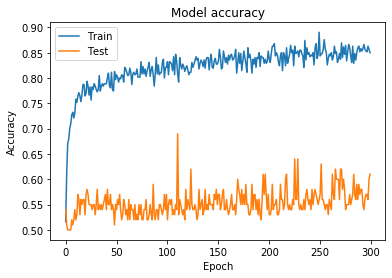


# Evaluate on test data
40/40 [==============================] - 0s 2ms/sample - loss: 0.6140 - acc: 0.6500
test loss, test acc: [0.6140446150209755, 0.65]
1
EEG_Deep/Data2A/parsed_P01T.mat
(0, 12, 4096)
(80, 12, 4096)
(80, 1)
2
EEG_Deep/Data2A/parsed_P02T.mat
(80, 12, 4096)
(160, 12, 4096)
(160, 1)
3
EEG_Deep/Data2A/parsed_P03T.mat
(160, 12, 4096)
(240, 12, 4096)
(240, 1)
5
EEG_Deep/Data2A/parsed_P05T.mat
(240, 12, 4096)
(320, 12, 4096)
(320, 1)
6
EEG_Deep/Data2A/parsed_P06T.mat
(320, 12, 4096)
(400, 12, 4096)
(400, 1)
7
EEG_Deep/Data2A/parsed_P07T.mat
(400, 12, 4096)
(480, 12, 4096)
(480, 1)
8
EEG_Deep/Data2A/parsed_P08T.mat
(480, 12, 4096)
(560, 12, 4096)
(560, 1)
9
EEG_Deep/Data2A/parsed_P09T.mat
(560, 12, 4096)
(640, 12, 4096)
(640, 1)
10
EEG_Deep/Data2A/parsed_P010T.mat
(640, 12, 4096)
(720, 12, 4096)
(720, 1)
4
EEG_Deep/Data2A/parsed_P04E.mat
(0, 12, 4096)
(40, 12, 4096)
(40, 1)
Filtering of training data in progress
(720, 12, 4096)
Filtering of test data in progress
(40, 12, 4

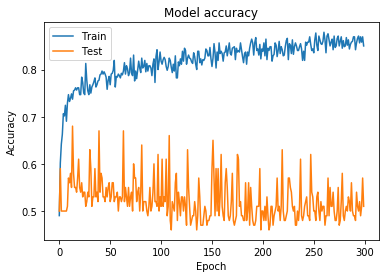


# Evaluate on test data
40/40 [==============================] - 0s 3ms/sample - loss: 0.4685 - acc: 0.7250
test loss, test acc: [0.46849945541471244, 0.725]
1
EEG_Deep/Data2A/parsed_P01T.mat
(0, 12, 4096)
(80, 12, 4096)
(80, 1)
3
EEG_Deep/Data2A/parsed_P03T.mat
(80, 12, 4096)
(160, 12, 4096)
(160, 1)
4
EEG_Deep/Data2A/parsed_P04T.mat
(160, 12, 4096)
(240, 12, 4096)
(240, 1)
5
EEG_Deep/Data2A/parsed_P05T.mat
(240, 12, 4096)
(320, 12, 4096)
(320, 1)
6
EEG_Deep/Data2A/parsed_P06T.mat
(320, 12, 4096)
(400, 12, 4096)
(400, 1)
7
EEG_Deep/Data2A/parsed_P07T.mat
(400, 12, 4096)
(480, 12, 4096)
(480, 1)
8
EEG_Deep/Data2A/parsed_P08T.mat
(480, 12, 4096)
(560, 12, 4096)
(560, 1)
9
EEG_Deep/Data2A/parsed_P09T.mat
(560, 12, 4096)
(640, 12, 4096)
(640, 1)
10
EEG_Deep/Data2A/parsed_P010T.mat
(640, 12, 4096)
(720, 12, 4096)
(720, 1)
2
EEG_Deep/Data2A/parsed_P02E.mat
(0, 12, 4096)
(40, 12, 4096)
(40, 1)
Filtering of training data in progress
(720, 12, 4096)
Filtering of test data in progress
(40, 12,

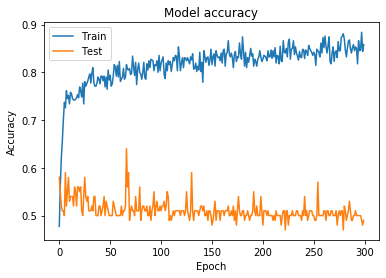


# Evaluate on test data
40/40 [==============================] - 0s 3ms/sample - loss: 0.4401 - acc: 0.8500
test loss, test acc: [0.44008426542859524, 0.85]
1
EEG_Deep/Data2A/parsed_P01T.mat
(0, 12, 4096)
(80, 12, 4096)
(80, 1)
2
EEG_Deep/Data2A/parsed_P02T.mat
(80, 12, 4096)
(160, 12, 4096)
(160, 1)
3
EEG_Deep/Data2A/parsed_P03T.mat
(160, 12, 4096)
(240, 12, 4096)
(240, 1)
4
EEG_Deep/Data2A/parsed_P04T.mat
(240, 12, 4096)
(320, 12, 4096)
(320, 1)
5
EEG_Deep/Data2A/parsed_P05T.mat
(320, 12, 4096)
(400, 12, 4096)
(400, 1)
6
EEG_Deep/Data2A/parsed_P06T.mat
(400, 12, 4096)
(480, 12, 4096)
(480, 1)
7
EEG_Deep/Data2A/parsed_P07T.mat
(480, 12, 4096)
(560, 12, 4096)
(560, 1)
9
EEG_Deep/Data2A/parsed_P09T.mat
(560, 12, 4096)
(640, 12, 4096)
(640, 1)
10
EEG_Deep/Data2A/parsed_P010T.mat
(640, 12, 4096)
(720, 12, 4096)
(720, 1)
8
EEG_Deep/Data2A/parsed_P08E.mat
(0, 12, 4096)
(40, 12, 4096)
(40, 1)
Filtering of training data in progress
(720, 12, 4096)
Filtering of test data in progress
(40, 12, 

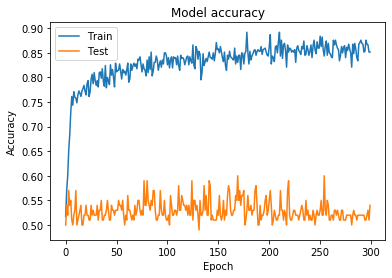


# Evaluate on test data
40/40 [==============================] - 0s 3ms/sample - loss: 0.7197 - acc: 0.6250
test loss, test acc: [0.7197243425527858, 0.625]
1
EEG_Deep/Data2A/parsed_P01T.mat
(0, 12, 4096)
(80, 12, 4096)
(80, 1)
2
EEG_Deep/Data2A/parsed_P02T.mat
(80, 12, 4096)
(160, 12, 4096)
(160, 1)
3
EEG_Deep/Data2A/parsed_P03T.mat
(160, 12, 4096)
(240, 12, 4096)
(240, 1)
4
EEG_Deep/Data2A/parsed_P04T.mat
(240, 12, 4096)
(320, 12, 4096)
(320, 1)
5
EEG_Deep/Data2A/parsed_P05T.mat
(320, 12, 4096)
(400, 12, 4096)
(400, 1)
6
EEG_Deep/Data2A/parsed_P06T.mat
(400, 12, 4096)
(480, 12, 4096)
(480, 1)
7
EEG_Deep/Data2A/parsed_P07T.mat
(480, 12, 4096)
(560, 12, 4096)
(560, 1)
8
EEG_Deep/Data2A/parsed_P08T.mat
(560, 12, 4096)
(640, 12, 4096)
(640, 1)
10
EEG_Deep/Data2A/parsed_P010T.mat
(640, 12, 4096)
(720, 12, 4096)
(720, 1)
9
EEG_Deep/Data2A/parsed_P09E.mat
(0, 12, 4096)
(40, 12, 4096)
(40, 1)
Filtering of training data in progress
(720, 12, 4096)
Filtering of test data in progress
(40, 12, 

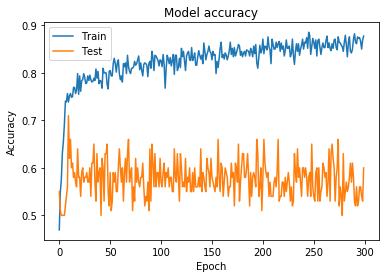


# Evaluate on test data
40/40 [==============================] - 0s 3ms/sample - loss: 0.7280 - acc: 0.5500
test loss, test acc: [0.7279863136820495, 0.55]
1
EEG_Deep/Data2A/parsed_P01T.mat
(0, 12, 4096)
(80, 12, 4096)
(80, 1)
2
EEG_Deep/Data2A/parsed_P02T.mat
(80, 12, 4096)
(160, 12, 4096)
(160, 1)
3
EEG_Deep/Data2A/parsed_P03T.mat
(160, 12, 4096)
(240, 12, 4096)
(240, 1)
4
EEG_Deep/Data2A/parsed_P04T.mat
(240, 12, 4096)
(320, 12, 4096)
(320, 1)
5
EEG_Deep/Data2A/parsed_P05T.mat
(320, 12, 4096)
(400, 12, 4096)
(400, 1)
7
EEG_Deep/Data2A/parsed_P07T.mat
(400, 12, 4096)
(480, 12, 4096)
(480, 1)
8
EEG_Deep/Data2A/parsed_P08T.mat
(480, 12, 4096)
(560, 12, 4096)
(560, 1)
9
EEG_Deep/Data2A/parsed_P09T.mat
(560, 12, 4096)
(640, 12, 4096)
(640, 1)
10
EEG_Deep/Data2A/parsed_P010T.mat
(640, 12, 4096)
(720, 12, 4096)
(720, 1)
6
EEG_Deep/Data2A/parsed_P06E.mat
(0, 12, 4096)
(40, 12, 4096)
(40, 1)
Filtering of training data in progress
(720, 12, 4096)
Filtering of test data in progress
(40, 12, 4

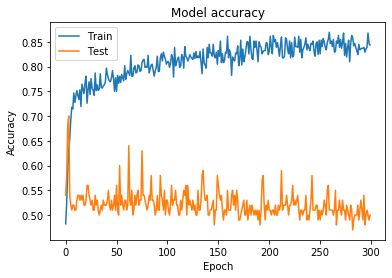


# Evaluate on test data
40/40 [==============================] - 0s 3ms/sample - loss: 0.8426 - acc: 0.6750
test loss, test acc: [0.8426251159515232, 0.675]
[[0.61404462]
 [0.44008427]
 [0.88235981]
 [0.46849946]
 [0.50512674]
 [0.84262512]
 [0.83273916]
 [0.71972434]
 [0.72798631]
 [0.79364807]]
[[0.64999998]
 [0.85000002]
 [0.625     ]
 [0.72500002]
 [0.75      ]
 [0.67500001]
 [0.60000002]
 [0.625     ]
 [0.55000001]
 [0.5       ]]


<Figure size 432x288 with 0 Axes>

In [30]:
from numpy import zeros
K.clear_session()
cols = 1
rows = 10
acc_all = zeros([rows, cols])
loss_all = zeros([rows, cols])
result=[]
count = 0
# data sample
data = array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
# prepare cross validation
kfold = KFold(10, True, 1)
# enumerate splits
for train, test in kfold.split(data):
  count = count + 1
  # print('train: %s, test: %s' % (data[train], data[test]))
  r_X_tr = np.empty([0, 12, 4096])
  Y_tr = np.empty([0,1])
  r_X_ts = np.empty([0, 12, 4096])
  Y_ts = np.empty([0,1])
  X_tr = np.empty([720, 12, 4096])
  X_ts = np.empty([40, 12, 4096])
  

  for x in data[train]:
    print(x)
    fName = 'EEG_Deep/Data2A/parsed_P0' + str(x) + 'T.mat'  # Load Data
    print(fName)
    mat = spio.loadmat(fName)
    x_tr = mat['RawEEGData']
    y_tr = mat['Labels']
    print(r_X_tr.shape)
    r_X_tr=np.append(r_X_tr, x_tr, axis=0)
    Y_tr=np.append(Y_tr, y_tr, axis=0)
    print(r_X_tr.shape)
    print(Y_tr.shape)


  for x in data[test]:
    print(x)
    subid = x 
    fName = 'EEG_Deep/Data2A/parsed_P0' + str(x) + 'E.mat'  # Load Data
    print(fName)
    mat = spio.loadmat(fName)
    x_ts = mat['RawEEGData']
    y_ts = mat['Labels']
    print(r_X_ts.shape)
    r_X_ts=np.append(r_X_ts, x_ts, axis=0)
    Y_ts=np.append(Y_ts, y_ts, axis=0)
    print(r_X_ts.shape)
    print(Y_ts.shape)


  ### Filter Training Data ###
  print("Filtering of training data in progress")
  for t in range(r_X_tr.shape[0]):
    tril = r_X_tr[t,:,:]
    # tril = tril.transpose()
    tril_filtered = butter_bandpass_filter(tril, 
                                              lowcut=8, 
                                              highcut=24, 
                                              fs=512,
                                              order=4)
    # tril_filtered = tril_filtered.transpose()
    X_tr[t,:,:] = tril_filtered
  
  print(X_tr.shape)

  ### Filter Test Data Data ###
  print("Filtering of test data in progress")
  for t in range(r_X_ts.shape[0]):
    tril = r_X_ts[t,:,:]
    # tril = tril.transpose()
    tril_filtered = butter_bandpass_filter(tril, 
                                              lowcut=8, 
                                              highcut=24, 
                                              fs=512,
                                              order=4)
    # tril_filtered = tril_filtered.transpose()
    X_ts[t,:,:] = tril_filtered

  print(X_ts.shape)

  # split data of each subject in training and validation
  X_train = X_tr[0:620,:,2560:4096]
  Y_train = Y_tr[0:620].ravel()
  X_val   = X_tr[620:,:,2560:4096]
  Y_val   = Y_tr[620:].ravel()
  print(Y_val)
  print(np.shape(X_train))
  print(np.shape(Y_train))
  print(np.shape(X_val))
  print(np.shape(Y_val))

  # convert labels to one-hot encodings.
  Y_train      = np_utils.to_categorical(Y_train-1, num_classes=4)
  Y_val       = np_utils.to_categorical(Y_val-1, num_classes=4)
  print(Y_val)

  kernels, chans, samples = 1, 12, 1536
  # convert data to NCHW (trials, kernels, channels, samples) format. Data 
  # contains 22 channels and 500 time-points. Set the number of kernels to 1.
  X_train = X_train.reshape(X_train.shape[0], kernels, chans, samples)
  X_val   = X_val.reshape(X_val.shape[0], kernels, chans, samples)
   
  print('X_train shape:', X_train.shape)
  print(X_train.shape[0], 'train samples')
  print(X_val.shape[0], 'val samples')

  X_test      = X_ts[:,:,2560:4096]
  Y_test      = Y_ts[:]
  print(np.shape(X_test))
  print(np.shape(Y_test))

  #convert labels to one-hot encodings.
  Y_test      = np_utils.to_categorical(Y_test-1, num_classes=4)

  # convert data to NCHW (trials, kernels, channels, samples) format. Data 
  # contains 22 channels and 500 time-points. Set the number of kernels to 1.
  X_test = X_test.reshape(X_test.shape[0], kernels, chans, samples)
  print('X_train shape:', X_test.shape)
  print(X_test.shape[0], 'train samples')

  # configure the EEGNet-8,2,16 model with kernel length of 32 samples (other 
  # model configurations may do better, but this is a good starting point)
  model = EEGNet(nb_classes = 4, Chans = 12, Samples = 1536,
                 dropoutRate = 0.5, kernLength = 25, F1 = 8, 
                 D = 2, F2 = 16, norm_rate = 0.25, dropoutType = 'Dropout')
      
  # compile the model and set the optimizers
  model.compile(loss='categorical_crossentropy', optimizer='adam', 
                metrics = ['accuracy'])

  # count number of parameters in the model
  numParams    = model.count_params() 

  # set a valid path for your system to record model checkpoints
  checkpointer = ModelCheckpoint(filepath='/tmp/checkpoint.h5', verbose=1,
                                 save_best_only=True)
  
  # the syntax is {class_1:weight_1, class_2:weight_2,...}. Here just setting
  # the weights all to be 1
  class_weights = {0:1, 1:1, 2:1, 3:1}

  history = model.fit(X_train, Y_train, batch_size = 16, epochs = 300,
                      verbose = 2, validation_data=(X_val, Y_val),
                      callbacks=[checkpointer], class_weight = class_weights)
  
  # Plot training & validation accuracy values
  plt.plot(history.history['acc'])
  plt.plot(history.history['val_acc'])
  plt.title('Model accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Test'], loc='upper left')
  plt.show()
  figName = 'Accuracy_A0' + str(x) + '.png'  
  plt.savefig(figName)

  print('\n# Evaluate on test data')
  results = model.evaluate(X_test, Y_test, batch_size=1)
  print('test loss, test acc:', results)

  loss_all[subid - 1, 0] = results[0]
  acc_all[subid - 1, 0] = results[1]
  
  from keras import backend as K 
  # Do some code, e.g. train and save model
  K.clear_session()

print(loss_all)
print(acc_all)

In [0]:
import pandas as pd
df_accl_all = pd.DataFrame({'Class1vs2': acc_all[:, 0]})
df_accl_all.to_csv (r'EEG_Deep/df_accl_Cross_Patient_8_24_2560:4096.csv', index = None, header=True) #Don't forget to add '.csv' at the end of the path
